In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from mlxtend.plotting import plot_decision_regions

In [ ]:
random_state = 42

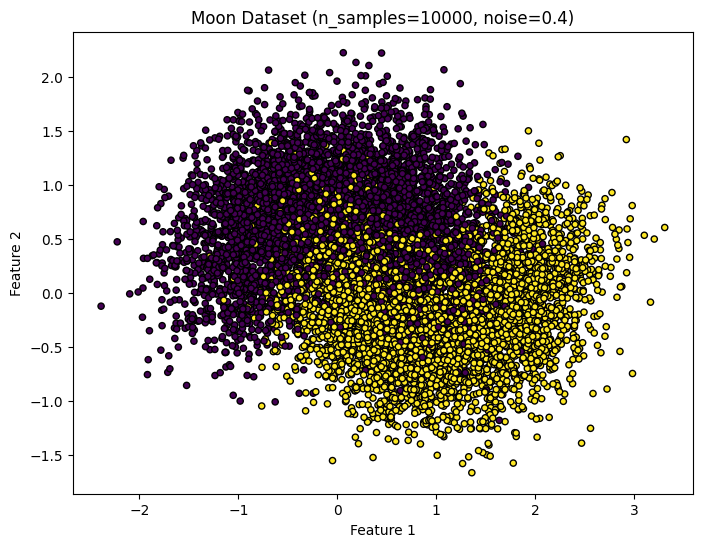

In [ ]:

X, y = make_moons(n_samples=10000, noise=0.4, random_state=random_state)


plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.title('Moon Dataset (n_samples=10000, noise=0.4)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 7000
Test samples: 3000


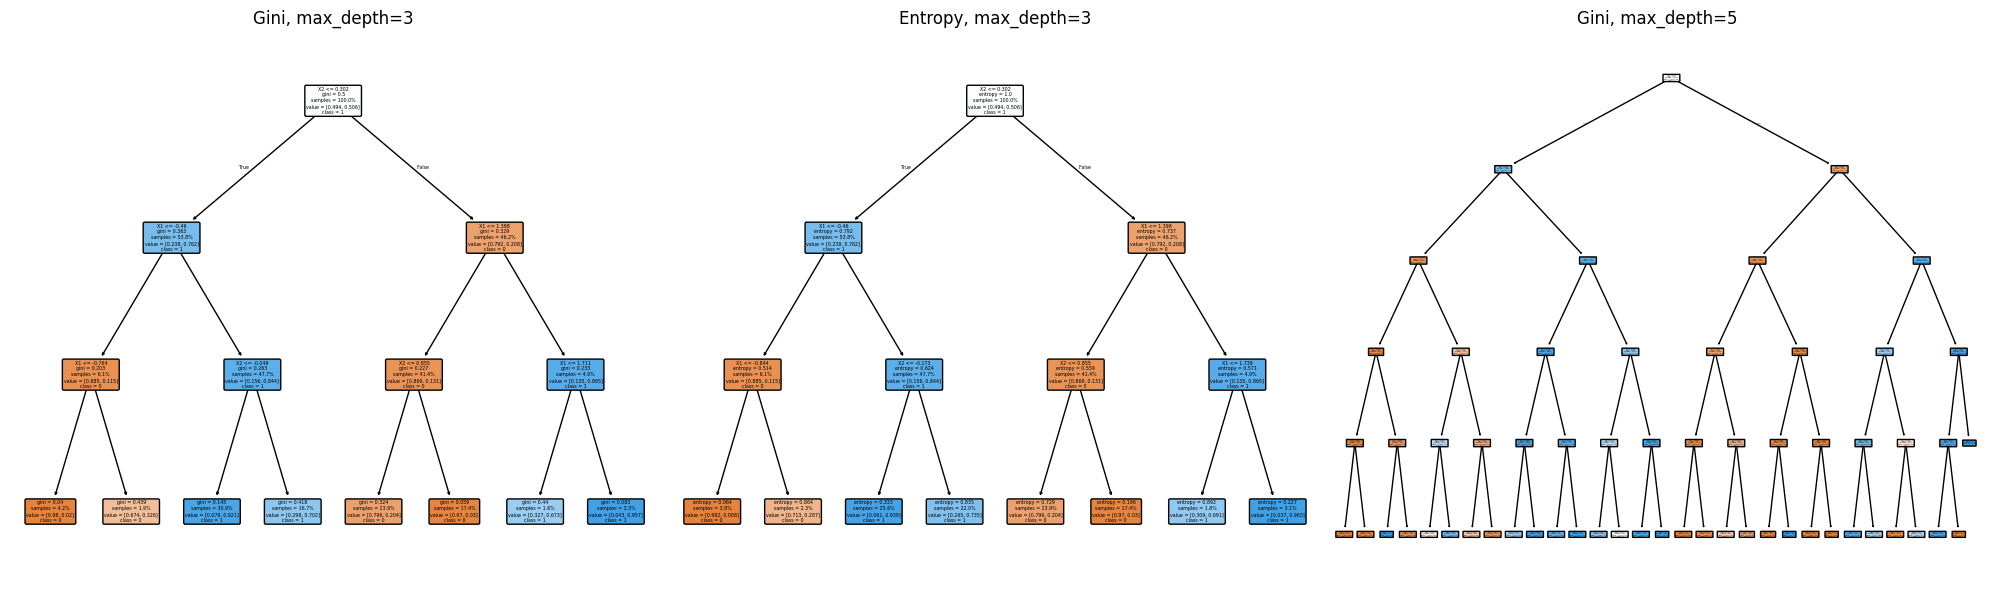

Decision Tree Performance on Test Set:
Gini, max_depth=3: Accuracy = 0.856
Entropy, max_depth=3: Accuracy = 0.856
Gini, max_depth=5: Accuracy = 0.855


In [ ]:

# - **Tree 1:** Gini criterion with max depth = 3
# - **Tree 2:** Entropy criterion with max depth = 3
# - **Tree 3:** Gini criterion with max depth = 5

tree_params = [
    ('Gini, max_depth=3', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=random_state)),
    ('Entropy, max_depth=3', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=random_state)),
    ('Gini, max_depth=5', DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=random_state))
]

plt.figure(figsize=(20, 6))
for i, (name, clf) in enumerate(tree_params):
    clf.fit(X_train, y_train)
    plt.subplot(1, 3, i+1)
    plot_tree(clf, filled=True, feature_names=['X1', 'X2'], class_names=['0', '1'], rounded=True, proportion=True)
    plt.title(name)
plt.tight_layout()
plt.show()

# Evaluate each tree on the test set
print("Decision Tree Performance on Test Set:")
for name, clf in tree_params:
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.3f}")


Random Forest Performance:
Random Forest with 5 trees: Accuracy = 0.830
Random Forest with 50 trees: Accuracy = 0.844
Random Forest with 100 trees: Accuracy = 0.843


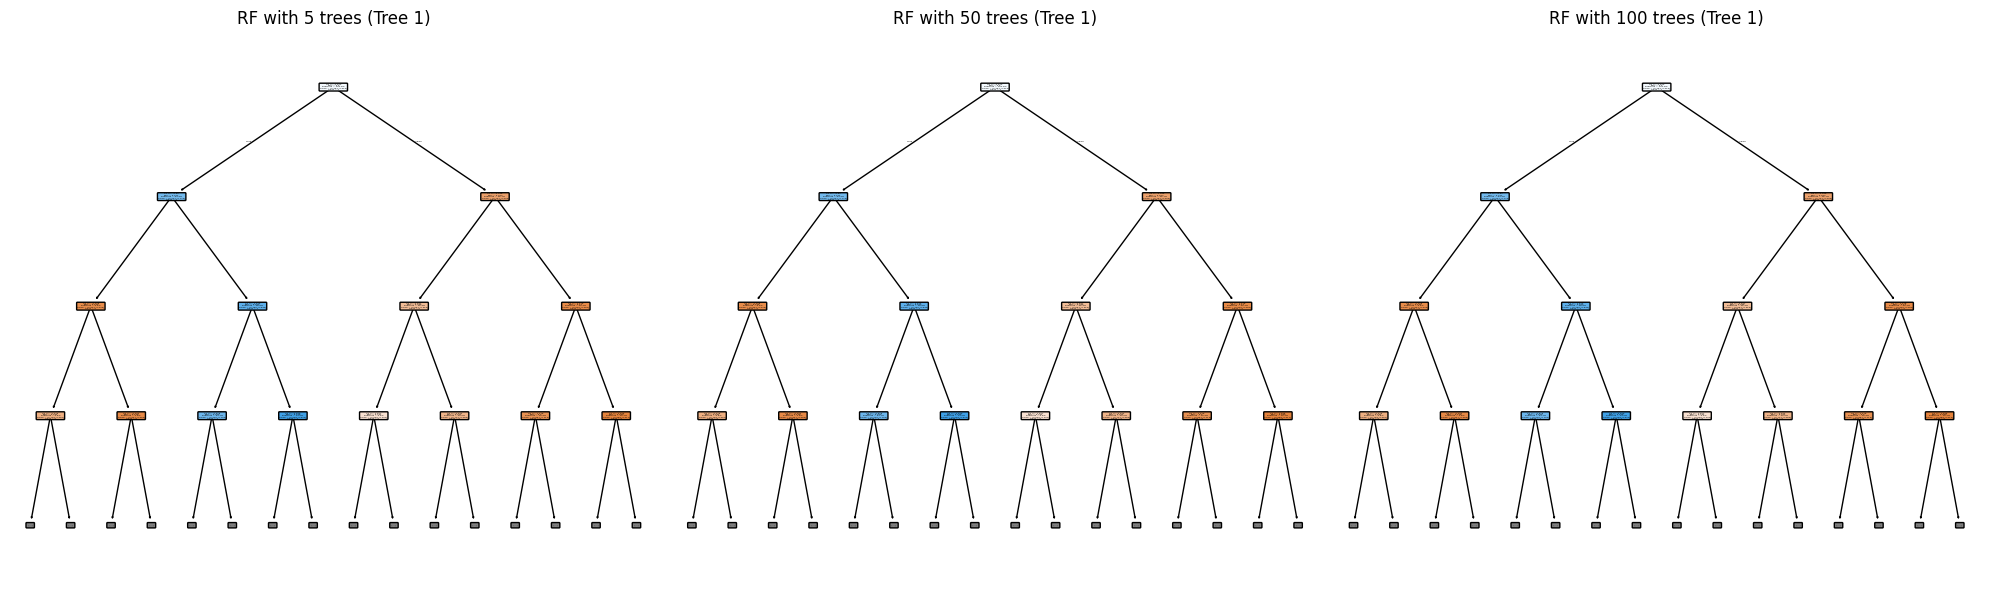

In [ ]:

rf_estimators = [5, 50, 100]
rf_classifiers = {}
print("\nRandom Forest Performance:")
for n in rf_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=random_state)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rf_classifiers[n] = rf
    print(f"Random Forest with {n} trees: Accuracy = {acc:.3f}")

# Visualize one tree from each Random Forest model
plt.figure(figsize=(20, 6))
for i, n in enumerate(rf_estimators):
    rf = rf_classifiers[n]
    tree_estimator = rf.estimators_[0]
    plt.subplot(1, 3, i+1)
    plot_tree(tree_estimator, filled=True, feature_names=['X1', 'X2'], class_names=['0', '1'], rounded=True,
              proportion=True, max_depth=3)
    plt.title(f"RF with {n} trees (Tree 1)")
plt.tight_layout()
plt.show()

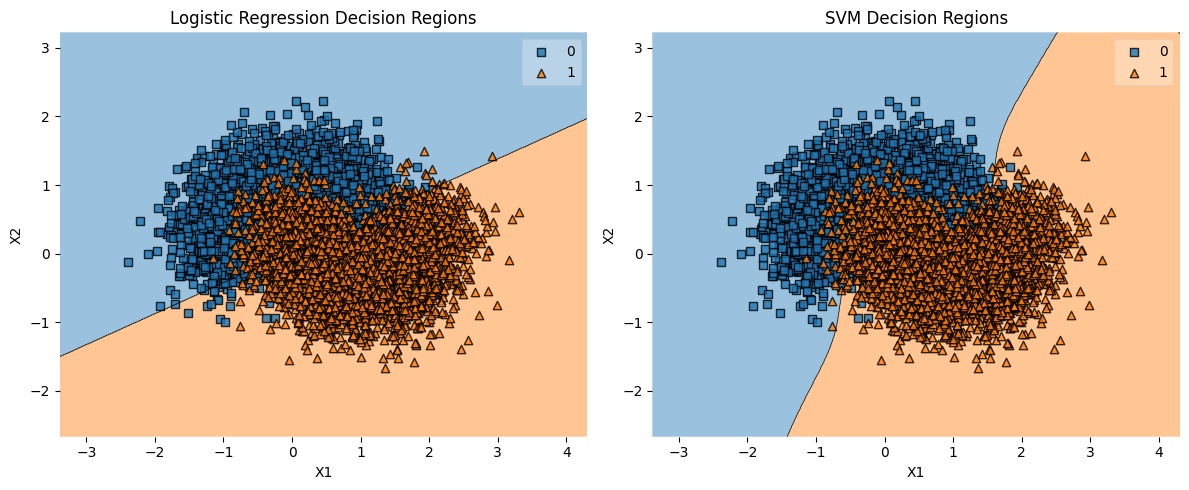

In [ ]:
lr = LogisticRegression(random_state=random_state, max_iter=1000)
svm = SVC(probability=True, random_state=random_state)

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plot_decision_regions(X_train, y_train, clf=lr)
plt.title('Logistic Regression Decision Regions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.subplot(1, 2, 2)
plot_decision_regions(X_train, y_train, clf=svm)
plt.title('SVM Decision Regions')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('svm', svm),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=random_state))
    ],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier Performance on Test Set:")
print(classification_report(y_test, y_pred_voting))


Voting Classifier Performance on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1539
           1       0.84      0.87      0.85      1461

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



In [ ]:

print("### Logistic Regression Performance:")
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

print("### SVM Performance:")
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

print("### Random Forest Performances:")
for n in rf_estimators:
    rf = rf_classifiers[n]
    y_pred_rf = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_rf)
    print(f"RF with {n} trees: Accuracy = {acc:.3f}")

print("### Voting Classifier Performance:")
print(classification_report(y_test, y_pred_voting))

### Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1539
           1       0.81      0.84      0.83      1461

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000

### SVM Performance:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1539
           1       0.85      0.88      0.86      1461

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000

### Random Forest Performances:
RF with 5 trees: Accuracy = 0.830
RF with 50 trees: Accuracy = 0.844
RF with 100 trees: Accuracy = 0.843
### Voting Classifier Performance:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1539
       